In [1]:
import pandas as pd

file_path = 'sales.csv'
data = pd.read_csv(file_path)

print("Sütunlar:")
print(data.columns)
print("\nVeri Şekli:")
print(data.shape)
print("\nÖrnek Veri:")
print(data.head())
print("\nVeri Tipleri:")
print(data.dtypes)


Sütunlar:
Index(['sale_id', 'branch', 'city', 'customer_type', 'gender', 'product_name',
       'product_category', 'unit_price', 'quantity', 'tax', 'total_price',
       'reward_points'],
      dtype='object')

Veri Şekli:
(1000, 12)

Örnek Veri:
   sale_id branch         city customer_type  gender  product_name  \
0        1      A     New York        Member    Male       Shampoo   
1        2      B  Los Angeles        Normal  Female      Notebook   
2        3      A     New York        Member  Female         Apple   
3        4      A      Chicago        Normal    Male     Detergent   
4        5      B  Los Angeles        Member  Female  Orange Juice   

  product_category  unit_price  quantity   tax  total_price  reward_points  
0    Personal Care        5.50         3  1.16        17.66              1  
1       Stationery        2.75        10  1.93        29.43              0  
2           Fruits        1.20        15  1.26        19.26              1  
3        Household     

In [2]:
city_sales = data.groupby('city')['total_price'].sum()
print("\nŞehir Bazlı Toplam Satış:")
print(city_sales)


Şehir Bazlı Toplam Satış:
city
Chicago        42584.71
Los Angeles    35772.26
New York       40226.93
Name: total_price, dtype: float64


In [3]:
category_sales = data.groupby('product_category')['total_price'].sum()
print("\nÜrün Kategorisi Bazlı Toplam Satış:")
print(category_sales)


Ürün Kategorisi Bazlı Toplam Satış:
product_category
Beverages        22983.32
Fruits           26197.45
Household        21615.84
Personal Care    27050.18
Stationery       20737.11
Name: total_price, dtype: float64


In [4]:
customer_type_distribution = data['customer_type'].value_counts()
print("\nMüşteri Türü Dağılımı:")
print(customer_type_distribution)


Müşteri Türü Dağılımı:
customer_type
Member    516
Normal    484
Name: count, dtype: int64


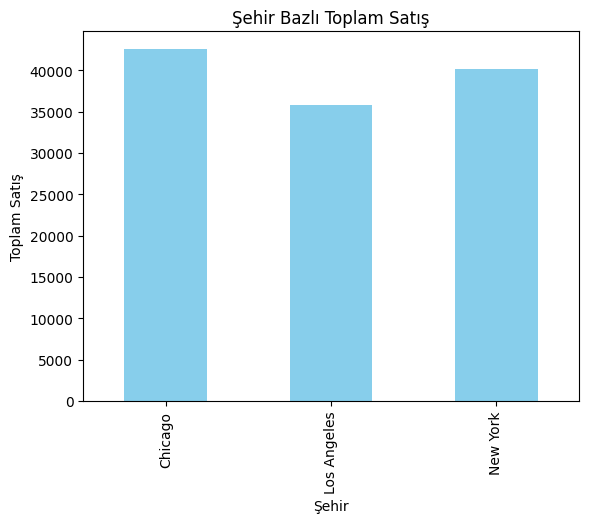

In [7]:
import matplotlib.pyplot as plt
city_sales.plot(kind='bar', title='Şehir Bazlı Toplam Satış', ylabel='Toplam Satış', xlabel='Şehir', color='skyblue')
plt.show()

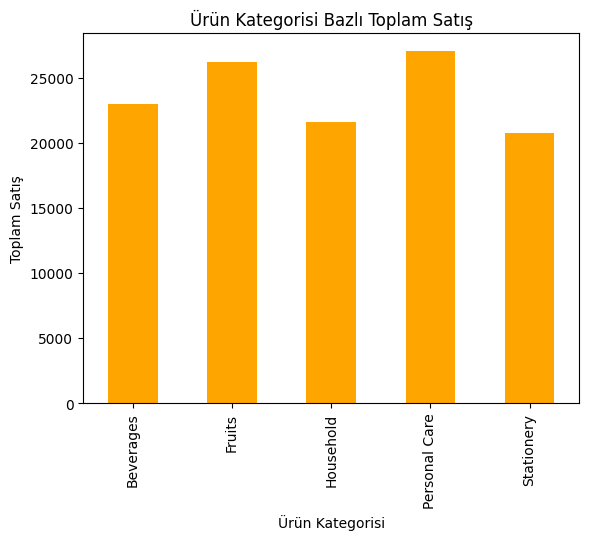

In [10]:
import matplotlib.pyplot as plt
category_sales.plot(kind='bar', title='Ürün Kategorisi Bazlı Toplam Satış', ylabel='Toplam Satış', xlabel='Ürün Kategorisi', color='orange')
plt.show()

In [11]:
sales_tax_analysis = data.groupby('customer_type')[['total_price', 'tax']].sum()
print("\nMüşteri Türüne Göre Toplam Satış ve Vergi:")
print(sales_tax_analysis)


Müşteri Türüne Göre Toplam Satış ve Vergi:
               total_price      tax
customer_type                      
Member            63213.63  4135.59
Normal            55370.27  3622.42


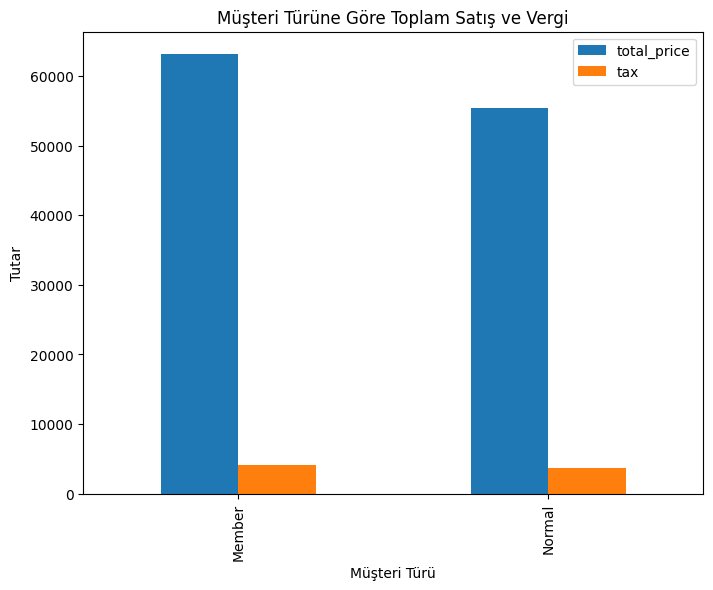

In [12]:
sales_tax_analysis.plot(kind='bar', figsize=(8, 6), title='Müşteri Türüne Göre Toplam Satış ve Vergi')
plt.ylabel('Tutar')
plt.xlabel('Müşteri Türü')
plt.show()

In [13]:
gender_analysis = data.groupby('gender')[['total_price', 'reward_points']].sum()
print("\nCinsiyete Göre Toplam Satış ve Ödül Puanları:")
print(gender_analysis)


Cinsiyete Göre Toplam Satış ve Ödül Puanları:
        total_price  reward_points
gender                            
Female     54265.45           2957
Male       64318.45           3100


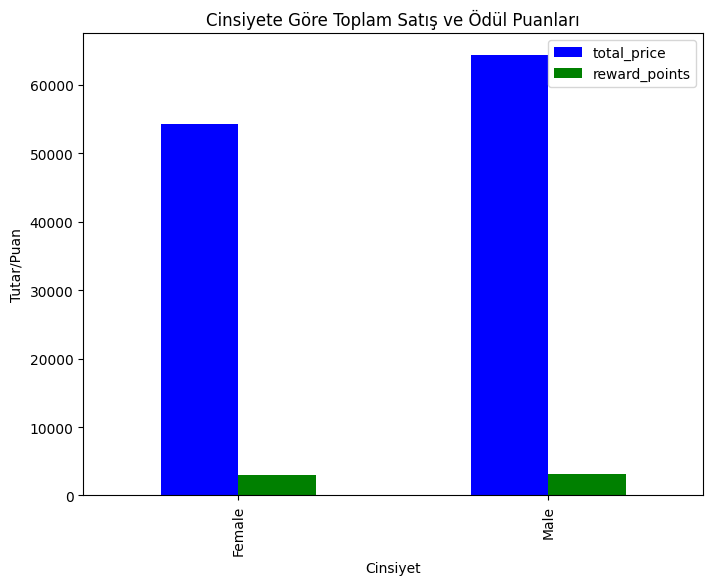

In [14]:
gender_analysis.plot(kind='bar', figsize=(8, 6), title='Cinsiyete Göre Toplam Satış ve Ödül Puanları', color=['blue', 'green'])
plt.ylabel('Tutar/Puan')
plt.xlabel('Cinsiyet')
plt.show()

In [15]:
branch_analysis = data.groupby('branch')[['total_price']].agg(['sum', 'count'])
branch_analysis.columns = ['Total Sales', 'Transaction Count']
print("\nŞube Performansı:")
print(branch_analysis)


Şube Performansı:
        Total Sales  Transaction Count
branch                                
A          82811.64                674
B          35772.26                326


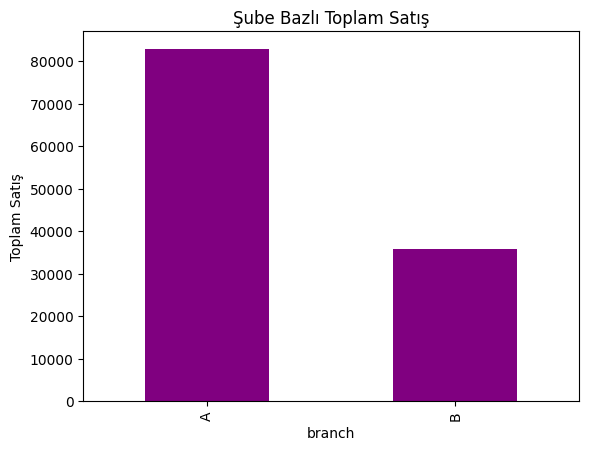

In [16]:
branch_analysis['Total Sales'].plot(kind='bar', title='Şube Bazlı Toplam Satış', ylabel='Toplam Satış', color='purple')
plt.show()

In [17]:
top_products = data.groupby('product_name')['quantity'].sum().sort_values(ascending=False).head(10)
print("\nEn Çok Satılan 10 Ürün:")
print(top_products)



En Çok Satılan 10 Ürün:
product_name
Shampoo         2238
Orange Juice    2183
Notebook        2165
Detergent       2010
Apple           1741
Name: quantity, dtype: int64


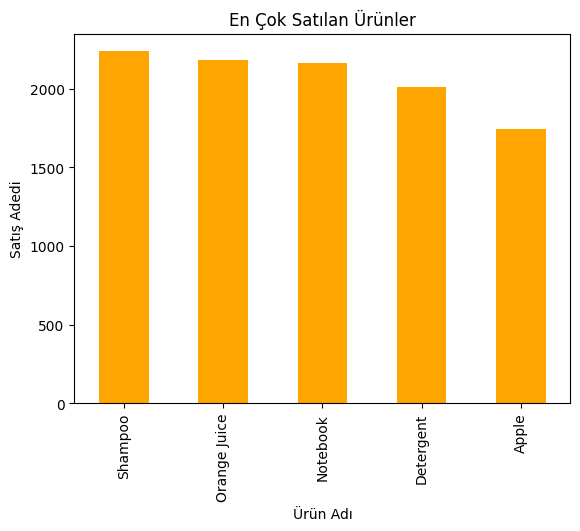

In [18]:
top_products.plot(kind='bar', title='En Çok Satılan Ürünler', xlabel='Ürün Adı', ylabel='Satış Adedi', color='orange')
plt.show()


Müşteri Türü ve Şehir Bazında Satışlar:
city            Chicago  Los Angeles  New York
customer_type                                 
Member         23715.88     17924.87  21572.88
Normal         18868.83     17847.39  18654.05


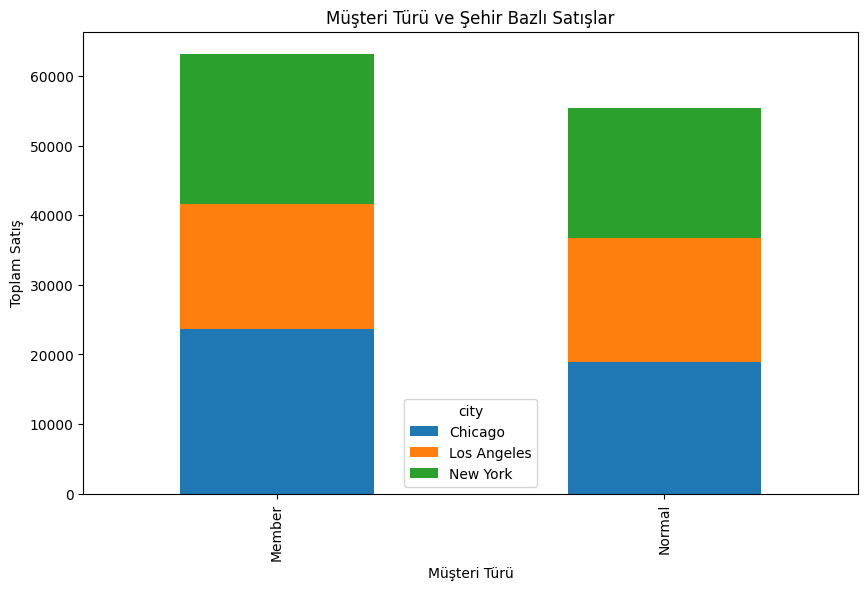

In [19]:
customer_city_sales = data.groupby(['customer_type', 'city'])['total_price'].sum().unstack()
print("\nMüşteri Türü ve Şehir Bazında Satışlar:")
print(customer_city_sales)

customer_city_sales.plot(kind='bar', stacked=True, figsize=(10, 6), title='Müşteri Türü ve Şehir Bazlı Satışlar')
plt.ylabel('Toplam Satış')
plt.xlabel('Müşteri Türü')
plt.show()


Vergi ve Toplam Satış Korelasyonu:
             tax  total_price
tax          1.0          1.0
total_price  1.0          1.0


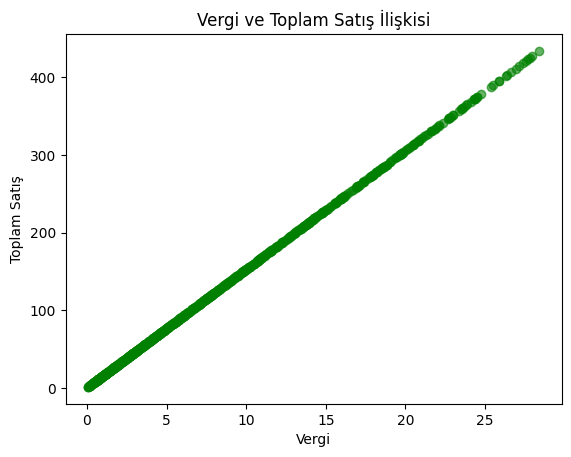

In [20]:
correlation = data[['tax', 'total_price']].corr()
print("\nVergi ve Toplam Satış Korelasyonu:")
print(correlation)

# Dağılım Grafiği
plt.scatter(data['tax'], data['total_price'], alpha=0.6, c='green')
plt.title('Vergi ve Toplam Satış İlişkisi')
plt.xlabel('Vergi')
plt.ylabel('Toplam Satış')
plt.show()